# Creating Hilbert curves with dictionaries in python 

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from enum import auto

## Analysing the Hilbert curve from a non-mathematic viewpoint

If you look sharply at the Hilbert curve at  [wikipedia](https://en.wikipedia.org/wiki/Hilbert_curve), you'll notice that it is self-similar. In contrast to other ogres from the monster curve universe, this one is not generated by simple recursive replacement of parts of the function with itself. We can distinguish between four basic types of sequences, compliant to the [wikipedia.de](https://de.wikipedia.org/wiki/Hilbert-Kurve) article, name them A, B, C and D. I put them together in the class HSymb.

Each one of them is based on a sequence of 3 movements to connect the centers of 4 even subsquares which can be determined by dividing the superior square 2 by 2. Within these subsquares we can apply the same operation recursively. 

Each square contains its own specific sequence, based on its position within the superior square. We notice that 
a superior suqare's type result in an ordered pattern of subsquares, namely: 
* A results in DAAB
* B results in CBBA
* C results in BCCA
* D results in ADDC 

Now, if we take our square and think of its subordinated parts as tuples of symbols based on the symbol we have in their parental, we can create a dictionary in python from that.

    hilbert_dispatcher = {
        HSymb.A : (HSymb.D,HSymb.A,HSymb.A,HSymb.B),
        HSymb.B : (HSymb.C,HSymb.B,HSymb.B,HSymb.A),
        HSymb.C : (HSymb.B,HSymb.C,HSymb.C,HSymb.D),
        HSymb.D : (HSymb.A,HSymb.D,HSymb.D,HSymb.C)
    }
    
Why that? If we use the dictionary to decode underlying symbols (aka square types) from, we can apply the resulting symbols with the dictionary once more - et voila : recursive magic appears. 
I put that together for demonstration. You'll get a List containing the lists of subsymbols, again containing a list of subsymbols...

Aside from their GATTACA-alike genetic names, they show interesting properties. 
A, D and B, C are mirror-symmetric, thus resulting in the same starting point, but different finish. 
if we take the namespace with enumeration symbols {A,B,C,D}, we got 
* DAAB is +3 ,0 ,0 , 1  from A 
* ADDC is -3 ,0 ,0 ,-1  from D 
* CBBA is +1 ,0 ,0 ,-1  from B
* BCCD is -1 ,0 ,0 ,+1  from C 
, so we have some interesting symmetriy also here, just to mention it.

In [147]:
# first: enum symbols displaying quadrant behaviour in Hilbert curve
class HSymb: #hilbert symbol 
    A = 'A'
    B = 'B' 
    C = 'C' 
    D = 'D'

def hilbert_kurve(iteration, symbol, level=0):
    hilbert_dispatcher = {
        HSymb.A : (HSymb.D,HSymb.A,HSymb.A,HSymb.B),
        HSymb.B : (HSymb.C,HSymb.B,HSymb.B,HSymb.A),
        HSymb.C : (HSymb.B,HSymb.C,HSymb.C,HSymb.D),
        HSymb.D : (HSymb.A,HSymb.D,HSymb.D,HSymb.C)
    }
    if iteration > 0 :
        temp=[]
        for subsymbol in hilbert_dispatcher[symbol]:
            temp.append(hilbert_kurve(iteration-1,subsymbol,level+1))
        res = [symbol,temp]
    else: 
        return symbol
    return res        

In [152]:
print(hilbert_kurve(1,HSymb.A))

['A', ['D', 'A', 'A', 'B']]


## Transforming into coordinate generator
Since we now have a list of symbols, which represents how to move along the 4 quadrants under each symbol, we could transform that into an actual sampling order of pixels of an image with matching dimensions. Thats the nice part. 
What is done here: 
    * replace the Symbols in class Hsymb with the corresponding x,y movements in each subsquare
    * we know that these subsquares have to be connected: this can be done by adding single movements from the senior square above, we are appending them here in between the subsquare movements. 

In [382]:
class HSymb: #hilbert symbol represents movements in coordinates
    A = ( 0, 1),(1,0),(0,-1)
    B = ( -1,0),(0,-1),(1,0)
    C = (0, -1),(-1,0),(0,1) 
    D = ( 1, 0),(0,1),(-1,0)

def hilbert_kurve(iteration, symbol, level=0):
    hilbert_dispatcher = {
        HSymb.A : (HSymb.D,HSymb.A,HSymb.A,HSymb.B),
        HSymb.B : (HSymb.C,HSymb.B,HSymb.B,HSymb.A),
        HSymb.C : (HSymb.B,HSymb.C,HSymb.C,HSymb.D),
        HSymb.D : (HSymb.A,HSymb.D,HSymb.D,HSymb.C)
    }
    if iteration > 0 :
        temp=[]
       # res=[]
        idx_symbol = 0
        for subsymbol in hilbert_dispatcher[symbol]:
            temp.extend(hilbert_kurve(iteration-1,subsymbol,level+1))
            if idx_symbol < 3:
                temp.append(symbol[idx_symbol])
            idx_symbol+=1;
        res=temp
    else: 
        return symbol
    return res  


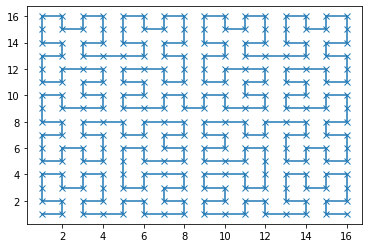

In [383]:
#drawing stuff
position = (1,1)
result=[position]
for move in hilbert_kurve(3,HSymb.A): 
    position = (position[0]+move[0],position[1]+move[1])
    result.append(position)
x,y = zip(*result)
plt.plot(*zip(*result),'-x')

## Disclaimer
I am not a professional programmer, nor am I using python frequently. If I made you smile, you made my day. 